In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_analysis = pd.read_csv('..\data\df_analysis.csv')

In [3]:
df_analysis['Precipitation_7d_rolling_sum'].replace(np.nan, 0, inplace =True)

C:\Users\ALiEN\AppData\Local\Temp\ipykernel_2520\1070904917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['Precipitation_7d_rolling_sum'].replace(np.nan, 0, inplace =True)


In [4]:
df_analysis.head()

,Precipitation_mm,Min_Temp_C,Max_Temp_C,Precipitation_7d_rolling_sum,Year,Month,Day_of_Year,Day_of_Week,Month_sin,Month_cos,Day_of_Year_sin,Day_of_Year_cos
0,0.0,0.3,20.2,0.0,1999,1,1,4,0.5,0.866025,0.017202,0.999852
1,0.0,0.8,21.0,0.0,1999,1,2,5,0.5,0.866025,0.034398,0.999408
2,0.0,0.5,23.6,0.0,1999,1,3,6,0.5,0.866025,0.051584,0.998669
3,0.0,1.2,22.2,0.0,1999,1,4,0,0.5,0.866025,0.068755,0.997634
4,0.0,1.0,21.7,0.0,1999,1,5,1,0.5,0.866025,0.085906,0.996303


In [5]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9422 entries, 0 to 9421
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Precipitation_mm              9422 non-null   float64
 1   Min_Temp_C                    9422 non-null   float64
 2   Max_Temp_C                    9422 non-null   float64
 3   Precipitation_7d_rolling_sum  9422 non-null   float64
 4   Year                          9422 non-null   int64  
 5   Month                         9422 non-null   int64  
 6   Day_of_Year                   9422 non-null   int64  
 7   Day_of_Week                   9422 non-null   int64  
 8   Month_sin                     9422 non-null   float64
 9   Month_cos                     9422 non-null   float64
 10  Day_of_Year_sin               9422 non-null   float64
 11  Day_of_Year_cos               9422 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 883.4 KB


In [6]:
# 2a. Reconstruct DatetimeIndex for df_analysis
print("Reconstructing date index for df_analysis...")
# Use pd.to_datetime with the specified format '%Y-%j' for Year and Day_of_Year
df_analysis['Date'] = pd.to_datetime(df_analysis['Year'].astype(str) + '-' + df_analysis['Day_of_Year'].astype(str), format='%Y-%j')
df_analysis.set_index('Date', inplace=True)
print("-> df_analysis index set successfully.")

Reconstructing date index for df_analysis...
-> df_analysis index set successfully.


In [7]:
df_analysis.isnull().sum()

Precipitation_mm                0
Min_Temp_C                      0
Max_Temp_C                      0
Precipitation_7d_rolling_sum    0
Year                            0
Month                           0
Day_of_Year                     0
Day_of_Week                     0
Month_sin                       0
Month_cos                       0
Day_of_Year_sin                 0
Day_of_Year_cos                 0
dtype: int64

In [8]:
df_analysis.head()

,Precipitation_mm,Min_Temp_C,Max_Temp_C,Precipitation_7d_rolling_sum,Year,Month,Day_of_Year,Day_of_Week,Month_sin,Month_cos,Day_of_Year_sin,Day_of_Year_cos
Date,,,,,,,,,,,,
1999-01-01,0.0,0.3,20.2,0.0,1999,1,1,4,0.5,0.866025,0.017202,0.999852
1999-01-02,0.0,0.8,21.0,0.0,1999,1,2,5,0.5,0.866025,0.034398,0.999408
1999-01-03,0.0,0.5,23.6,0.0,1999,1,3,6,0.5,0.866025,0.051584,0.998669
1999-01-04,0.0,1.2,22.2,0.0,1999,1,4,0,0.5,0.866025,0.068755,0.997634
1999-01-05,0.0,1.0,21.7,0.0,1999,1,5,1,0.5,0.866025,0.085906,0.996303


#### Lagged Features (Past Values):
Crucial for capturing persistence.

In [9]:
# Lagged temperatures for 1, 2, 3, 7 days prior
for i in [1, 2, 3, 7]:
    df_analysis[f'Max_Temp_C_lag_{i}'] = df_analysis['Max_Temp_C'].shift(i)
    df_analysis[f'Min_Temp_C_lag_{i}'] = df_analysis['Min_Temp_C'].shift(i)

# Lagged precipitation for 1, 2, 3, 7 days prior
for i in [1, 2, 3, 7]:
    df_analysis[f'Precipitation_mm_lag_{i}'] = df_analysis['Precipitation_mm'].shift(i)

# Drop NaNs that result from shifting (these will be at the beginning of the series)
df_analysis.dropna(inplace=True)

In [10]:
df_analysis

,Precipitation_mm,Min_Temp_C,Max_Temp_C,Precipitation_7d_rolling_sum,Year,Month,Day_of_Year,Day_of_Week,Month_sin,Month_cos,...,Max_Temp_C_lag_2,Min_Temp_C_lag_2,Max_Temp_C_lag_3,Min_Temp_C_lag_3,Max_Temp_C_lag_7,Min_Temp_C_lag_7,Precipitation_mm_lag_1,Precipitation_mm_lag_2,Precipitation_mm_lag_3,Precipitation_mm_lag_7
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-08,0.0,1.0,20.1,0.0,1999,1,8,4,0.500000,0.866025,...,21.0,0.2,21.7,1.0,20.2,0.3,0.0,0.0,0.0,0.00
1999-01-09,0.0,2.3,14.8,0.0,1999,1,9,5,0.500000,0.866025,...,13.6,0.8,21.0,0.2,21.0,0.8,0.0,0.0,0.0,0.00
1999-01-10,0.0,1.2,17.1,0.0,1999,1,10,6,0.500000,0.866025,...,20.1,1.0,13.6,0.8,23.6,0.5,0.0,0.0,0.0,0.00
1999-01-11,0.0,-2.0,20.4,0.0,1999,1,11,0,0.500000,0.866025,...,14.8,2.3,20.1,1.0,22.2,1.2,0.0,0.0,0.0,0.00
1999-01-12,0.0,-1.4,21.0,0.0,1999,1,12,1,0.500000,0.866025,...,17.1,1.2,14.8,2.3,21.7,1.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-13,0.0,14.7,28.0,0.0,2024,10,287,6,-0.866025,0.500000,...,28.5,16.9,29.1,16.5,27.5,18.4,0.0,0.0,0.0,0.01
2024-10-14,0.0,17.2,27.5,0.0,2024,10,288,0,-0.866025,0.500000,...,28.3,16.5,28.5,16.9,29.4,18.5,0.0,0.0,0.0,0.00
2024-10-15,0.0,15.0,27.5,0.0,2024,10,289,1,-0.866025,0.500000,...,28.0,14.7,28.3,16.5,28.5,18.4,0.0,0.0,0.0,0.00


### Rolled window features (aggregates of past values):
Capture recent trends and variability. Useful for capturing "weather regimes."

In [11]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9415 entries, 1999-01-08 to 2024-10-17
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Precipitation_mm              9415 non-null   float64
 1   Min_Temp_C                    9415 non-null   float64
 2   Max_Temp_C                    9415 non-null   float64
 3   Precipitation_7d_rolling_sum  9415 non-null   float64
 4   Year                          9415 non-null   int64  
 5   Month                         9415 non-null   int64  
 6   Day_of_Year                   9415 non-null   int64  
 7   Day_of_Week                   9415 non-null   int64  
 8   Month_sin                     9415 non-null   float64
 9   Month_cos                     9415 non-null   float64
 10  Day_of_Year_sin               9415 non-null   float64
 11  Day_of_Year_cos               9415 non-null   float64
 12  Max_Temp_C_lag_1              9415 non-null 

In [12]:
# Rolling mean and std dev for temperatures over 7 and 30 days
for window in [7, 30]:
    df_analysis[f'Max_Temp_C_rolling_mean_{window}d'] = df_analysis['Max_Temp_C'].rolling(window=window).mean()
    df_analysis[f'Min_Temp_C_rolling_mean_{window}d'] = df_analysis['Min_Temp_C'].rolling(window=window).mean()
    df_analysis[f'Max_Temp_C_rolling_std_{window}d'] = df_analysis['Max_Temp_C'].rolling(window=window).std()
    df_analysis[f'Min_Temp_C_rolling_std_{window}d'] = df_analysis['Min_Temp_C'].rolling(window=window).std()

# Rolling sum for precipitation over 7 and 30 days
for window in [7, 30]:
    df_analysis[f'Precipitation_mm_rolling_sum_{window}d'] = df_analysis['Precipitation_mm'].rolling(window=window).sum()
    df_analysis[f'Precipitation_mm_rolling_std_{window}d'] = df_analysis['Precipitation_mm'].rolling(window=window).std()

# Drop NaNs created by rolling windows (these will be at the very beginning)
df_analysis.dropna(inplace=True)

In [13]:
# Derived Features (Interactions/Transformations):
df_analysis['Daily_Temp_Range'] = df_analysis['Max_Temp_C'] - df_analysis['Min_Temp_C']
# You could also add lagged versions of this
df_analysis['Daily_Temp_Range_lag_1'] = df_analysis['Daily_Temp_Range'].shift(1)

# If you anticipate non-linear effects, polynomial features (Max_Temp_C_squared, etc.) could be added, but let's hold off unless needed.

In [14]:
df_analysis

,Precipitation_mm,Min_Temp_C,Max_Temp_C,Precipitation_7d_rolling_sum,Year,Month,Day_of_Year,Day_of_Week,Month_sin,Month_cos,...,Max_Temp_C_rolling_mean_30d,Min_Temp_C_rolling_mean_30d,Max_Temp_C_rolling_std_30d,Min_Temp_C_rolling_std_30d,Precipitation_mm_rolling_sum_7d,Precipitation_mm_rolling_std_7d,Precipitation_mm_rolling_sum_30d,Precipitation_mm_rolling_std_30d,Daily_Temp_Range,Daily_Temp_Range_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
1999-02-06,0.0,3.6,23.8,0.0,1999,2,37,5,0.866025,0.5,...,21.330000,1.873333,2.525067,2.086894,0.0,0.0,4.20,0.662597,20.2,NaN
1999-02-07,0.0,2.8,24.5,0.0,1999,2,38,6,0.866025,0.5,...,21.476667,1.933333,2.578383,2.086795,0.0,0.0,4.20,0.662597,21.7,20.2
1999-02-08,0.0,4.3,24.4,0.0,1999,2,39,0,0.866025,0.5,...,21.796667,2.000000,2.302095,2.130404,0.0,0.0,4.20,0.662597,20.1,21.7
1999-02-09,0.0,8.1,25.6,0.0,1999,2,40,1,0.866025,0.5,...,22.080000,2.230000,2.225929,2.396859,0.0,0.0,4.20,0.662597,17.5,20.1
1999-02-10,0.0,7.7,26.6,0.0,1999,2,41,2,0.866025,0.5,...,22.286667,2.553333,2.348989,2.459988,0.0,0.0,4.20,0.662597,18.9,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-13,0.0,14.7,28.0,0.0,2024,10,287,6,-0.866025,0.5,...,28.726667,19.016667,3.200532,1.845233,0.0,0.0,332.63,43.843094,13.3,11.8
2024-10-14,0.0,17.2,27.5,0.0,2024,10,288,0,-0.866025,0.5,...,28.693333,18.940000,3.208172,1.872045,0.0,0.0,322.83,43.889503,10.3,13.3
2024-10-15,0.0,15.0,27.5,0.0,2024,10,289,1,-0.866025,0.5,...,28.663333,18.813333,3.215210,2.005636,0.0,0.0,321.33,43.901270,12.5,10.3


In [15]:
df_analysis.dropna(inplace=True)

In [16]:
df_analysis

,Precipitation_mm,Min_Temp_C,Max_Temp_C,Precipitation_7d_rolling_sum,Year,Month,Day_of_Year,Day_of_Week,Month_sin,Month_cos,...,Max_Temp_C_rolling_mean_30d,Min_Temp_C_rolling_mean_30d,Max_Temp_C_rolling_std_30d,Min_Temp_C_rolling_std_30d,Precipitation_mm_rolling_sum_7d,Precipitation_mm_rolling_std_7d,Precipitation_mm_rolling_sum_30d,Precipitation_mm_rolling_std_30d,Daily_Temp_Range,Daily_Temp_Range_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
1999-02-07,0.0,2.8,24.5,0.0,1999,2,38,6,0.866025,0.5,...,21.476667,1.933333,2.578383,2.086795,0.0,0.0,4.20,0.662597,21.7,20.2
1999-02-08,0.0,4.3,24.4,0.0,1999,2,39,0,0.866025,0.5,...,21.796667,2.000000,2.302095,2.130404,0.0,0.0,4.20,0.662597,20.1,21.7
1999-02-09,0.0,8.1,25.6,0.0,1999,2,40,1,0.866025,0.5,...,22.080000,2.230000,2.225929,2.396859,0.0,0.0,4.20,0.662597,17.5,20.1
1999-02-10,0.0,7.7,26.6,0.0,1999,2,41,2,0.866025,0.5,...,22.286667,2.553333,2.348989,2.459988,0.0,0.0,4.20,0.662597,18.9,17.5
1999-02-11,0.0,6.1,27.0,0.0,1999,2,42,3,0.866025,0.5,...,22.486667,2.803333,2.487033,2.425224,0.0,0.0,4.20,0.662597,20.9,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-13,0.0,14.7,28.0,0.0,2024,10,287,6,-0.866025,0.5,...,28.726667,19.016667,3.200532,1.845233,0.0,0.0,332.63,43.843094,13.3,11.8
2024-10-14,0.0,17.2,27.5,0.0,2024,10,288,0,-0.866025,0.5,...,28.693333,18.940000,3.208172,1.872045,0.0,0.0,322.83,43.889503,10.3,13.3
2024-10-15,0.0,15.0,27.5,0.0,2024,10,289,1,-0.866025,0.5,...,28.663333,18.813333,3.215210,2.005636,0.0,0.0,321.33,43.901270,12.5,10.3


### Baseline Model Training & Evaluation (Linear Regression):

### Implement and Train Gradient Boosting Machine (XGBoost):

#### Hyperparameter Tuning with TimeSeriesSplit:
Tuning is crucial to get the best performance from XGBoost. We'll use RandomizedSearchCV as it's more efficient than GridSearchCV for large search spaces, especially when starting out. TimeSeriesSplit ensures our cross-validation folds maintain chronological order, preventing data leakage.

Slight changes in the code as the target isn't just predicting  tempr after 3 days, but temperature for 1, 2 and 3 days ahead.

In [17]:
# Drop any previously created 'Target_' columns from the single 5-day ahead setup
df_analysis = df_analysis.drop(columns=[col for col in df_analysis.columns if 'Target_' in str(col)], errors='ignore')

# Create target variables for each horizon (t+1 to t+5) for both Max and Min temperatures
for horizon in range(1, 4): # Horizons from 1 to 3 days ahead
    df_analysis[f'Target_Max_Temp_C_t+{horizon}'] = df_analysis['Max_Temp_C'].shift(-horizon)
    df_analysis[f'Target_Min_Temp_C_t+{horizon}'] = df_analysis['Min_Temp_C'].shift(-horizon)

# Drop rows where any of the new target variables are NaN (these will be at the end of the DataFrame)
# Dropping based on the furthest horizon (t+5) ensures all shorter horizons are also present
df_analysis.dropna(subset=[f'Target_Max_Temp_C_t+3', f'Target_Min_Temp_C_t+3'], inplace=True)

In [18]:
df_analysis

,Precipitation_mm,Min_Temp_C,Max_Temp_C,Precipitation_7d_rolling_sum,Year,Month,Day_of_Year,Day_of_Week,Month_sin,Month_cos,...,Precipitation_mm_rolling_sum_30d,Precipitation_mm_rolling_std_30d,Daily_Temp_Range,Daily_Temp_Range_lag_1,Target_Max_Temp_C_t+1,Target_Min_Temp_C_t+1,Target_Max_Temp_C_t+2,Target_Min_Temp_C_t+2,Target_Max_Temp_C_t+3,Target_Min_Temp_C_t+3
Date,,,,,,,,,,,,,,,,,,,,,
1999-02-07,0.0,2.8,24.5,0.00,1999,2,38,6,0.866025,0.5,...,4.20,0.662597,21.7,20.2,24.4,4.3,25.6,8.1,26.6,7.7
1999-02-08,0.0,4.3,24.4,0.00,1999,2,39,0,0.866025,0.5,...,4.20,0.662597,20.1,21.7,25.6,8.1,26.6,7.7,27.0,6.1
1999-02-09,0.0,8.1,25.6,0.00,1999,2,40,1,0.866025,0.5,...,4.20,0.662597,17.5,20.1,26.6,7.7,27.0,6.1,28.7,5.9
1999-02-10,0.0,7.7,26.6,0.00,1999,2,41,2,0.866025,0.5,...,4.20,0.662597,18.9,17.5,27.0,6.1,28.7,5.9,28.5,5.2
1999-02-11,0.0,6.1,27.0,0.00,1999,2,42,3,0.866025,0.5,...,4.20,0.662597,20.9,18.9,28.7,5.9,28.5,5.2,28.4,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-10,0.0,16.5,29.1,0.03,2024,10,284,3,-0.866025,0.5,...,333.43,43.836360,12.6,13.0,28.5,16.9,28.3,16.5,28.0,14.7
2024-10-11,0.0,16.9,28.5,0.02,2024,10,285,4,-0.866025,0.5,...,333.43,43.836360,11.6,12.6,28.3,16.5,28.0,14.7,27.5,17.2
2024-10-12,0.0,16.5,28.3,0.01,2024,10,286,5,-0.866025,0.5,...,333.43,43.836360,11.8,11.6,28.0,14.7,27.5,17.2,27.5,15.0


In [19]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9382 entries, 1999-02-07 to 2024-10-14
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Precipitation_mm                  9382 non-null   float64
 1   Min_Temp_C                        9382 non-null   float64
 2   Max_Temp_C                        9382 non-null   float64
 3   Precipitation_7d_rolling_sum      9382 non-null   float64
 4   Year                              9382 non-null   int64  
 5   Month                             9382 non-null   int64  
 6   Day_of_Year                       9382 non-null   int64  
 7   Day_of_Week                       9382 non-null   int64  
 8   Month_sin                         9382 non-null   float64
 9   Month_cos                         9382 non-null   float64
 10  Day_of_Year_sin                   9382 non-null   float64
 11  Day_of_Year_cos                   9382 non-null   f

In [20]:
# List of all multi-horizon target columns
target_columns = [col for col in df_analysis.columns if 'Target_' in str(col)]

# Identify features (X) and targets (y)
# X includes all non-target, non-original temperature columns
feature_columns = [col for col in df_analysis.columns if col not in ['Max_Temp_C', 'Min_Temp_C'] + target_columns]

X = df_analysis[feature_columns]
y = df_analysis[target_columns] # y is now a DataFrame with 6 target columns

In [21]:
y

,Target_Max_Temp_C_t+1,Target_Min_Temp_C_t+1,Target_Max_Temp_C_t+2,Target_Min_Temp_C_t+2,Target_Max_Temp_C_t+3,Target_Min_Temp_C_t+3
Date,,,,,,
1999-02-07,24.4,4.3,25.6,8.1,26.6,7.7
1999-02-08,25.6,8.1,26.6,7.7,27.0,6.1
1999-02-09,26.6,7.7,27.0,6.1,28.7,5.9
1999-02-10,27.0,6.1,28.7,5.9,28.5,5.2
1999-02-11,28.7,5.9,28.5,5.2,28.4,5.4
...,...,...,...,...,...,...
2024-10-10,28.5,16.9,28.3,16.5,28.0,14.7
2024-10-11,28.3,16.5,28.0,14.7,27.5,17.2
2024-10-12,28.0,14.7,27.5,17.2,27.5,15.0


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9382 entries, 1999-02-07 to 2024-10-14
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Precipitation_mm                  9382 non-null   float64
 1   Precipitation_7d_rolling_sum      9382 non-null   float64
 2   Year                              9382 non-null   int64  
 3   Month                             9382 non-null   int64  
 4   Day_of_Year                       9382 non-null   int64  
 5   Day_of_Week                       9382 non-null   int64  
 6   Month_sin                         9382 non-null   float64
 7   Month_cos                         9382 non-null   float64
 8   Day_of_Year_sin                   9382 non-null   float64
 9   Day_of_Year_cos                   9382 non-null   float64
 10  Max_Temp_C_lag_1                  9382 non-null   float64
 11  Min_Temp_C_lag_1                  9382 non-null   f

In [23]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9382 entries, 1999-02-07 to 2024-10-14
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Precipitation_mm                  9382 non-null   float64
 1   Min_Temp_C                        9382 non-null   float64
 2   Max_Temp_C                        9382 non-null   float64
 3   Precipitation_7d_rolling_sum      9382 non-null   float64
 4   Year                              9382 non-null   int64  
 5   Month                             9382 non-null   int64  
 6   Day_of_Year                       9382 non-null   int64  
 7   Day_of_Week                       9382 non-null   int64  
 8   Month_sin                         9382 non-null   float64
 9   Month_cos                         9382 non-null   float64
 10  Day_of_Year_sin                   9382 non-null   float64
 11  Day_of_Year_cos                   9382 non-null   f

In [24]:
df_analysis.isnull().sum()

Precipitation_mm                    0
Min_Temp_C                          0
Max_Temp_C                          0
Precipitation_7d_rolling_sum        0
Year                                0
Month                               0
Day_of_Year                         0
Day_of_Week                         0
Month_sin                           0
Month_cos                           0
Day_of_Year_sin                     0
Day_of_Year_cos                     0
Max_Temp_C_lag_1                    0
Min_Temp_C_lag_1                    0
Max_Temp_C_lag_2                    0
Min_Temp_C_lag_2                    0
Max_Temp_C_lag_3                    0
Min_Temp_C_lag_3                    0
Max_Temp_C_lag_7                    0
Min_Temp_C_lag_7                    0
Precipitation_mm_lag_1              0
Precipitation_mm_lag_2              0
Precipitation_mm_lag_3              0
Precipitation_mm_lag_7              0
Max_Temp_C_rolling_mean_7d          0
Min_Temp_C_rolling_mean_7d          0
Max_Temp_C_r

In [25]:
# Determine the split point (e.g., 80% of the data)
split_index = int(len(df_analysis) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Train data ends on: {X_train.index.max()}")
print(f"Test data starts on: {X_test.index.min()}")

X_train shape: (7505, 36), y_train shape: (7505, 6)
X_test shape: (1877, 36), y_test shape: (1877, 6)
Train data ends on: 2019-08-25 00:00:00
Test data starts on: 2019-08-26 00:00:00


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("\n--- Training Baseline Model (Linear Regression) for Multi-Horizon Forecast ---")
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

print("\nBaseline Model (Linear Regression) Performance:")
for i in range(3): # Iterate through horizons 0 (t+1) to 4 (t+5)
    horizon = i + 1
    # Max Temp for current horizon
    mae_max = mean_absolute_error(y_test[f'Target_Max_Temp_C_t+{horizon}'], y_pred_baseline[:, i*2])
    rmse_max = np.sqrt(mean_squared_error(y_test[f'Target_Max_Temp_C_t+{horizon}'], y_pred_baseline[:, i*2]))
    # Min Temp for current horizon
    mae_min = mean_absolute_error(y_test[f'Target_Min_Temp_C_t+{horizon}'], y_pred_baseline[:, i*2+1])
    rmse_min = np.sqrt(mean_squared_error(y_test[f'Target_Min_Temp_C_t+{horizon}'], y_pred_baseline[:, i*2+1]))

    print(f"Horizon t+{horizon}:")
    print(f"  Max Temp: MAE = {mae_max:.2f} °C, RMSE = {rmse_max:.2f} °C")
    print(f"  Min Temp: MAE = {mae_min:.2f} °C, RMSE = {rmse_min:.2f} °C")


--- Training Baseline Model (Linear Regression) for Multi-Horizon Forecast ---

Baseline Model (Linear Regression) Performance:
Horizon t+1:
  Max Temp: MAE = 1.35 °C, RMSE = 1.93 °C
  Min Temp: MAE = 0.96 °C, RMSE = 1.27 °C
Horizon t+2:
  Max Temp: MAE = 1.56 °C, RMSE = 2.18 °C
  Min Temp: MAE = 1.07 °C, RMSE = 1.40 °C
Horizon t+3:
  Max Temp: MAE = 1.65 °C, RMSE = 2.29 °C
  Min Temp: MAE = 1.13 °C, RMSE = 1.48 °C


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split # To split our data

print("\n--- Starting Hyperparameter Tuning for XGBoost (Multi-Horizon) ---")

# Define a custom scorer that averages MAE across all targets, or focuses on the most critical one.
# For now, let's aim to optimize for the MAE of Max_Temp at horizon t+1, as it's the closest and most visible.
# If you want to average across all 10 targets during tuning, it becomes more complex and can be discussed.
# For simplicity, optimize for the *first* target which is Target_Max_Temp_C_t+1 (index 0 in y_train)

# We need a custom scorer for RandomizedSearchCV for multi-output regression.
# XGBoost can output multiple targets. make_scorer needs a function that takes y_true, y_pred.
# And it needs to return a single score (usually for the primary target of interest).

# Custom scorer for RandomizedSearchCV to optimize for Max_Temp at t+1 (the first output column)
# The scoring function for RandomizedSearchCV should accept (estimator, X, y_true)

def custom_mae_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    # Assuming y_pred[:,0] is Target_Max_Temp_C_t+1 prediction
    return -mean_absolute_error(y_true.iloc[:, 0], y_pred[:, 0]) # Return negative MAE for maximization

# Prepare the estimator
xgb_tuned_estimator = xgb.XGBRegressor(objective='reg:squarederror',
                                       random_state=42,
                                       n_jobs=-1)

param_dist = {
    'n_estimators': [500, 1000, 1500], # Increased upper bound
    'learning_rate': [0.01, 0.05, 0.1, 0.005, 0.2], # Wider range
    'max_depth': [3, 5, 7, 9, 11, 13], # Significantly wider range
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

tscv = TimeSeriesSplit(n_splits=5)

random_search = RandomizedSearchCV(estimator=xgb_tuned_estimator,
                                   param_distributions=param_dist,
                                   n_iter=50, # Increased iterations for broader search
                                   scoring=custom_mae_scorer, # Use our custom scorer
                                   cv=tscv,
                                   verbose=2, # Increased verbosity to see more output
                                   random_state=42,
                                   return_train_score=True)

# Fit the random search. Use early stopping inside the fit for individual models in the search.
# Note: `RandomizedSearchCV` itself doesn't directly support `eval_set` for early stopping during `fit`.
# To use early stopping effectively with `RandomizedSearchCV`, it's generally done in a custom cross-validation loop
# or by wrapping the model in a way that passes `eval_set`.
# For simplicity in this sprint, let's keep the `eval_set` for the *final* best model fit, not within the RandomizedSearchCV itself,
# as that adds significant complexity. `n_estimators` in param_dist can act as the 'upper bound' if chosen wisely.

# If RandomizedSearchCV takes too long, reduce n_iter or param_dist ranges.
random_search.fit(X_train, y_train)

print(f"\nBest parameters from RandomizedSearchCV: {random_search.best_params_}")
print(f"Best cross-validation MAE (for Target_Max_Temp_C_t+1): {-random_search.best_score_:.2f} °C")

# Get the best estimator found
best_xgb_model = random_search.best_estimator_


--- Starting Hyperparameter Tuning for XGBoost (Multi-Horizon) ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.005, max_depth=3, min_child_weight=10, n_estimators=500, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.005, max_depth=3, min_child_weight=10, n_estimators=500, subsample=1.0; total time=   4.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.005, max_depth=3, min_child_weight=10, n_estimators=500, subsample=1.0; total time=   5.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.005, max_depth=3, min_child_weight=10, n_estimators=500, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.005, max_depth=3, min_child_weight=10, n_estimators=500, subsample=1.0; total time=   6.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.005, max_depth=13, min_child_weight=10, n_estimators=1500, subsample=

In [ ]:
# Now, fit the best model on the full X_train for final evaluation with early stopping
# Create a small validation set from your training data for early stopping
X_train_fit, X_val_fit, y_train_fit, y_val_fit = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=False # Keep shuffle=False for time-series
)

# Add the early stopping parameters to your existing best estimator
best_xgb_model.set_params(
    early_stopping_rounds=500,
    eval_metric='rmse' # Using RMSE as a common metric for regression tasks
)

# Now, fit the modified best_xgb_model.
# It now contains both the best hyperparameters from the search AND the configuration for early stopping.
print("--- Fitting Final XGBoost Model with Early Stopping ---")
best_xgb_model.fit(
    X_train_fit, y_train_fit,
    eval_set=[(X_val_fit, y_val_fit)],
    verbose=True
)

--- Fitting Final XGBoost Model with Early Stopping ---
[0]	validation_0-rmse:8.28783


[1]	validation_0-rmse:8.20820
[2]	validation_0-rmse:8.12971
[3]	validation_0-rmse:8.05194
[4]	validation_0-rmse:7.97498
[5]	validation_0-rmse:7.89898
[6]	validation_0-rmse:7.82381
[7]	validation_0-rmse:7.74931
[8]	validation_0-rmse:7.67560
[9]	validation_0-rmse:7.60239
[10]	validation_0-rmse:7.53040
[11]	validation_0-rmse:7.45897
[12]	validation_0-rmse:7.38794
[13]	validation_0-rmse:7.31774
[14]	validation_0-rmse:7.24850
[15]	validation_0-rmse:7.17953
[16]	validation_0-rmse:7.11193
[17]	validation_0-rmse:7.04524
[18]	validation_0-rmse:6.97875
[19]	validation_0-rmse:6.91306
[20]	validation_0-rmse:6.84790
[21]	validation_0-rmse:6.78357
[22]	validation_0-rmse:6.71988
[23]	validation_0-rmse:6.65702
[24]	validation_0-rmse:6.59478
[25]	validation_0-rmse:6.53288
[26]	validation_0-rmse:6.47221
[27]	validation_0-rmse:6.41190
[28]	validation_0-rmse:6.35269
[29]	validation_0-rmse:6.29309
[30]	validation_0-rmse:6.23500
[31]	validation_0-rmse:6.17705
[32]	validation_0-rmse:6.11988
[33]	validation_0

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,500
,enable_categorical,False
,eval_metric,'rmse'


In [ ]:
# Use your fitted model to predict on the unseen test set
y_pred_tuned = best_xgb_model.predict(X_test)

# For easier and more reliable column access, convert the numpy prediction array to a pandas DataFrame
y_pred_tuned_df = pd.DataFrame(y_pred_tuned, index=y_test.index, columns=y_test.columns)

print("\n--- Final Tuned XGBoost Model Performance on Test Set ---")

# Loop through each horizon to calculate and display metrics
for i in range(3):
    horizon = i + 1
    max_target_col = f'Target_Max_Temp_C_t+{horizon}'
    min_target_col = f'Target_Min_Temp_C_t+{horizon}'

    # Calculate metrics for Max Temperature
    mae_max = mean_absolute_error(y_test[max_target_col], y_pred_tuned_df[max_target_col])
    rmse_max = np.sqrt(mean_squared_error(y_test[max_target_col], y_pred_tuned_df[max_target_col]))

    # Calculate metrics for Min Temperature
    mae_min = mean_absolute_error(y_test[min_target_col], y_pred_tuned_df[min_target_col])
    rmse_min = np.sqrt(mean_squared_error(y_test[min_target_col], y_pred_tuned_df[min_target_col]))

    print(f"Horizon t+{horizon}:")
    print(f"  Max Temp: MAE = {mae_max:.2f} °C, RMSE = {rmse_max:.2f} °C")
    print(f"  Min Temp: MAE = {mae_min:.2f} °C, RMSE = {rmse_min:.2f} °C")


--- Final Tuned XGBoost Model Performance on Test Set ---
Horizon t+1:
  Max Temp: MAE = 1.34 °C, RMSE = 1.93 °C
  Min Temp: MAE = 0.94 °C, RMSE = 1.25 °C
Horizon t+2:
  Max Temp: MAE = 1.52 °C, RMSE = 2.15 °C
  Min Temp: MAE = 1.05 °C, RMSE = 1.41 °C
Horizon t+3:
  Max Temp: MAE = 1.59 °C, RMSE = 2.25 °C
  Min Temp: MAE = 1.09 °C, RMSE = 1.47 °C


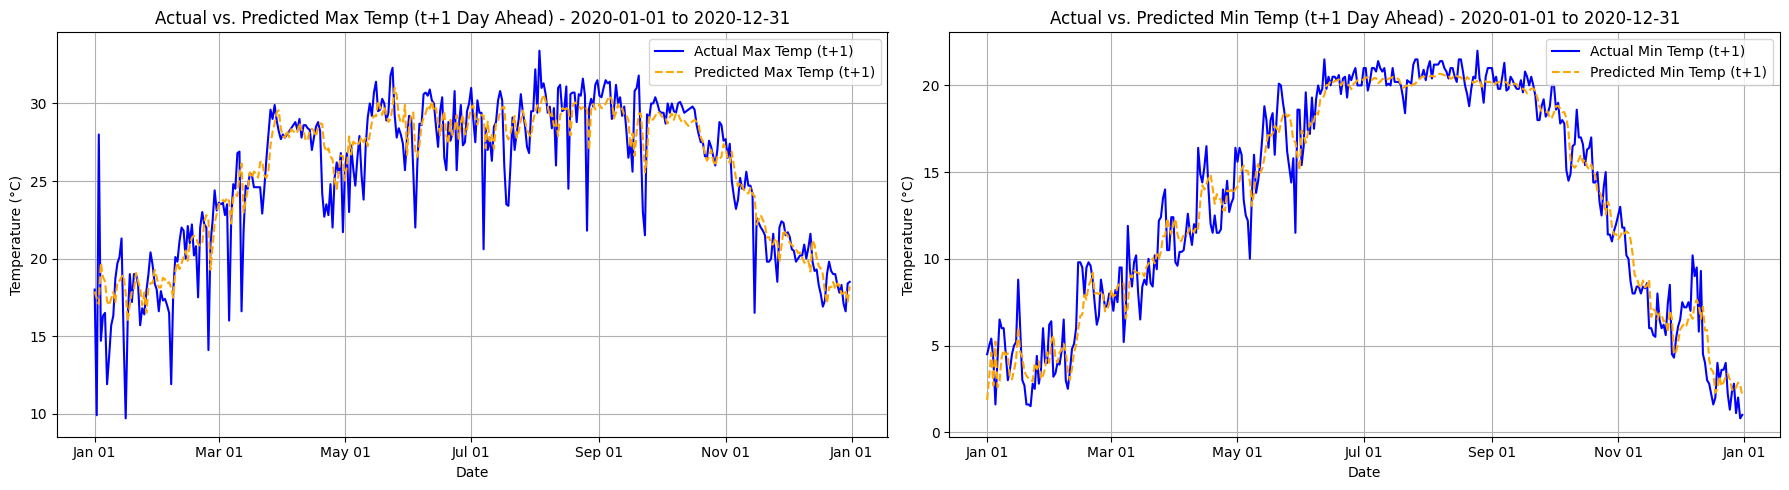

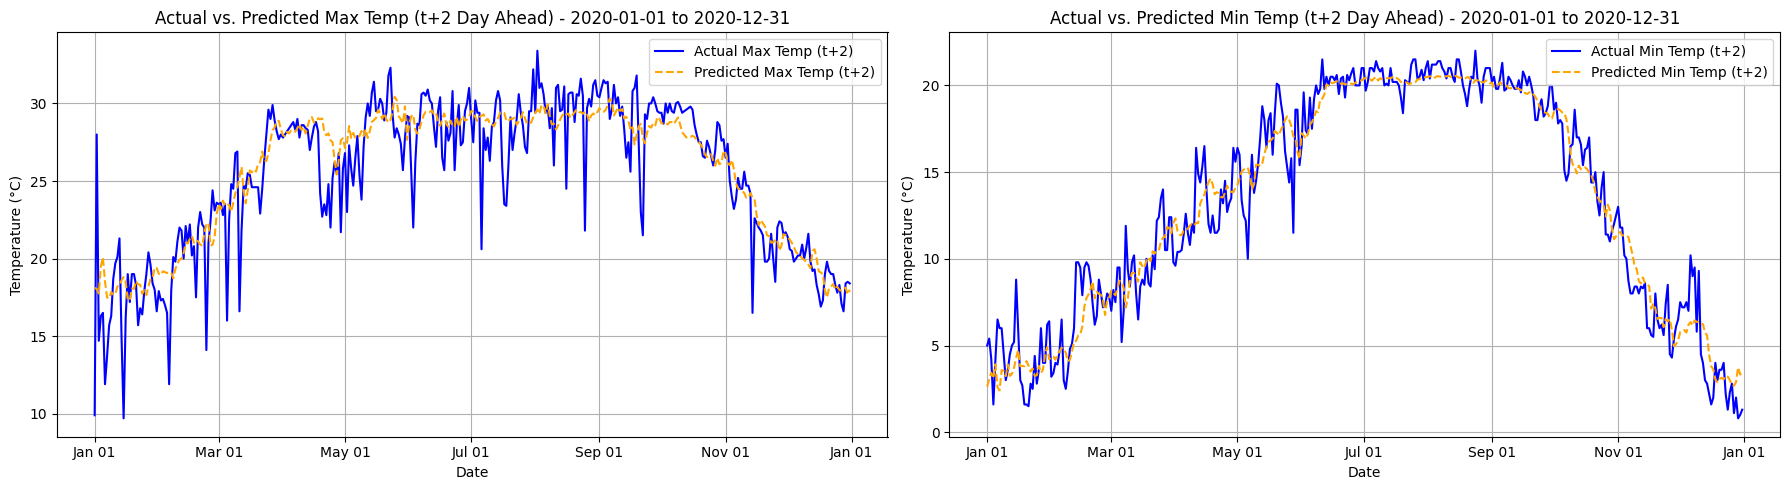

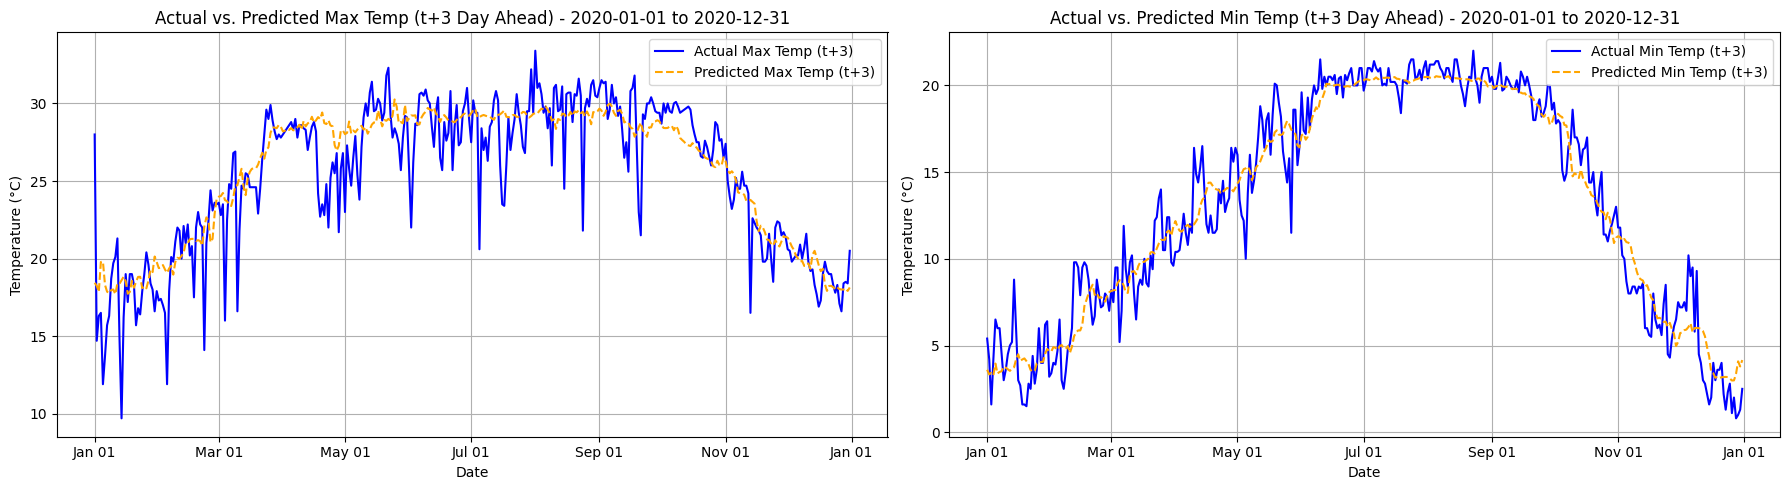


--- Deeper Error Analysis Questions (for your Markdown) ---
1. How does the visual fit (tightness of predicted vs. actual) change as the horizon increases from t+1 to t+5?
2. For which horizons (short/medium/long) and which temperature (Max/Min) does the model struggle most/least?
3. Can you identify any recurring periods (e.g., specific seasons, or after sharp changes) where the model's errors are consistently larger?
4. Does the model still exhibit 'smoothing' (failing to capture peaks and troughs) as the horizon increases?


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Choose a specific year from the test set for detailed visualization
start_viz_date = '2020-01-01'
end_viz_date = '2020-12-31'

test_dates = y_test.index
viz_mask = (test_dates >= start_viz_date) & (test_dates <= end_viz_date)

y_test_viz = y_test[viz_mask]
y_pred_xgb_viz = y_pred_tuned_df[viz_mask]

# Plot for t+1, t+2, t+3 horizons
horizons_to_plot = [1, 2, 3]  # Horizons from 1 to 3 days ahead

for h_idx, horizon in enumerate(horizons_to_plot):
    plt.figure(figsize=(18, 5))

    # Max Temperature for this horizon
    plt.subplot(1, 2, 1)
    plt.plot(y_test_viz.index, y_test_viz[f'Target_Max_Temp_C_t+{horizon}'], label=f'Actual Max Temp (t+{horizon})', color='blue')
    plt.plot(y_test_viz.index, y_pred_xgb_viz[f'Target_Max_Temp_C_t+{horizon}'], label=f'Predicted Max Temp (t+{horizon})', color='orange', linestyle='--')
    plt.title(f'Actual vs. Predicted Max Temp (t+{horizon} Day Ahead) - {start_viz_date} to {end_viz_date}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.savefig('Actual vs Predicted Max temp.png')

    # Min Temperature for this horizon
    plt.subplot(1, 2, 2)
    plt.plot(y_test_viz.index, y_test_viz[f'Target_Min_Temp_C_t+{horizon}'], label=f'Actual Min Temp (t+{horizon})', color='blue')
    plt.plot(y_test_viz.index, y_pred_xgb_viz[f'Target_Min_Temp_C_t+{horizon}'], label=f'Predicted Min Temp (t+{horizon})', color='orange', linestyle='--')
    plt.title(f'Actual vs. Predicted Min Temp (t+{horizon} Day Ahead) - {start_viz_date} to {end_viz_date}')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.tight_layout()
    plt.savefig('Actual vs Predicted Min temp.png')
    plt.show()

# Deeper error analysis questions
print("\n--- Deeper Error Analysis Questions (for your Markdown) ---")
print("1. How does the visual fit (tightness of predicted vs. actual) change as the horizon increases from t+1 to t+5?")
print("2. For which horizons (short/medium/long) and which temperature (Max/Min) does the model struggle most/least?")
print("3. Can you identify any recurring periods (e.g., specific seasons, or after sharp changes) where the model's errors are consistently larger?")
print("4. Does the model still exhibit 'smoothing' (failing to capture peaks and troughs) as the horizon increases?")

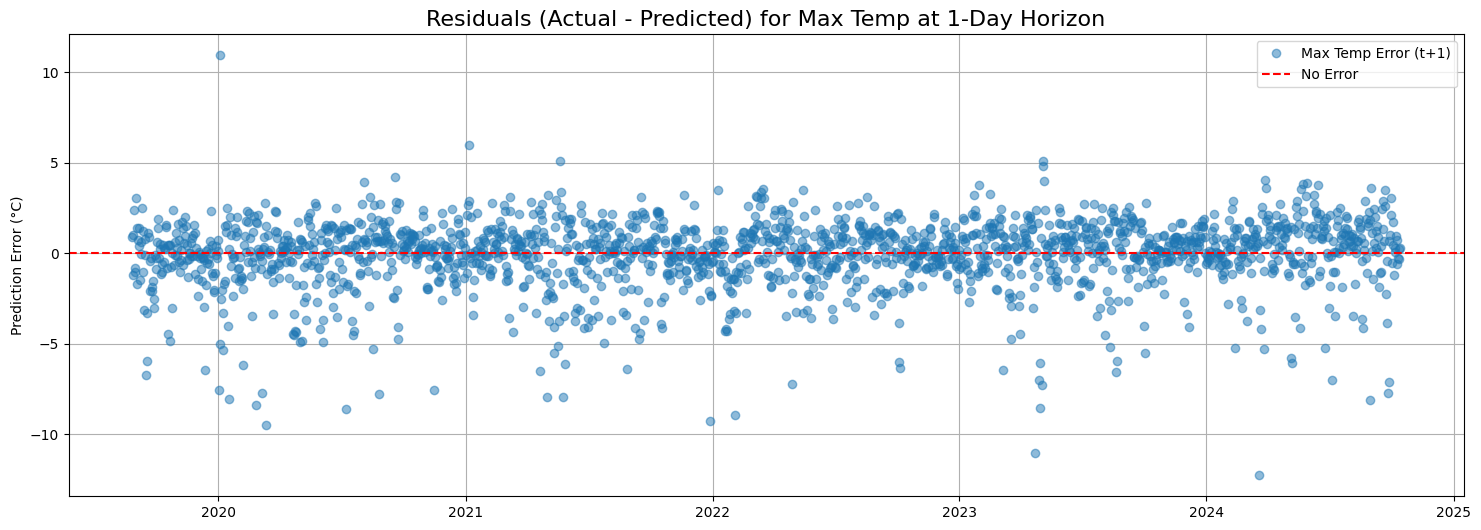

In [ ]:
# Plot Residuals Over Time
# Ensure y_pred_tuned_df is a DataFrame as created in the previous step
residuals_df = y_test - y_pred_tuned_df
residuals_df.columns = [f'Residual_{col}' for col in y_test.columns]

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
# We use 'o' (dots) instead of a line to see individual error points clearly
plt.plot(residuals_df.index, residuals_df['Residual_Target_Max_Temp_C_t+1'], 'o', alpha=0.5, label='Max Temp Error (t+1)')
plt.axhline(0, color='red', linestyle='--', label='No Error')
plt.title('Residuals (Actual - Predicted) for Max Temp at 1-Day Horizon', fontsize=16)
plt.ylabel('Prediction Error (°C)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'residuals_df' is not defined

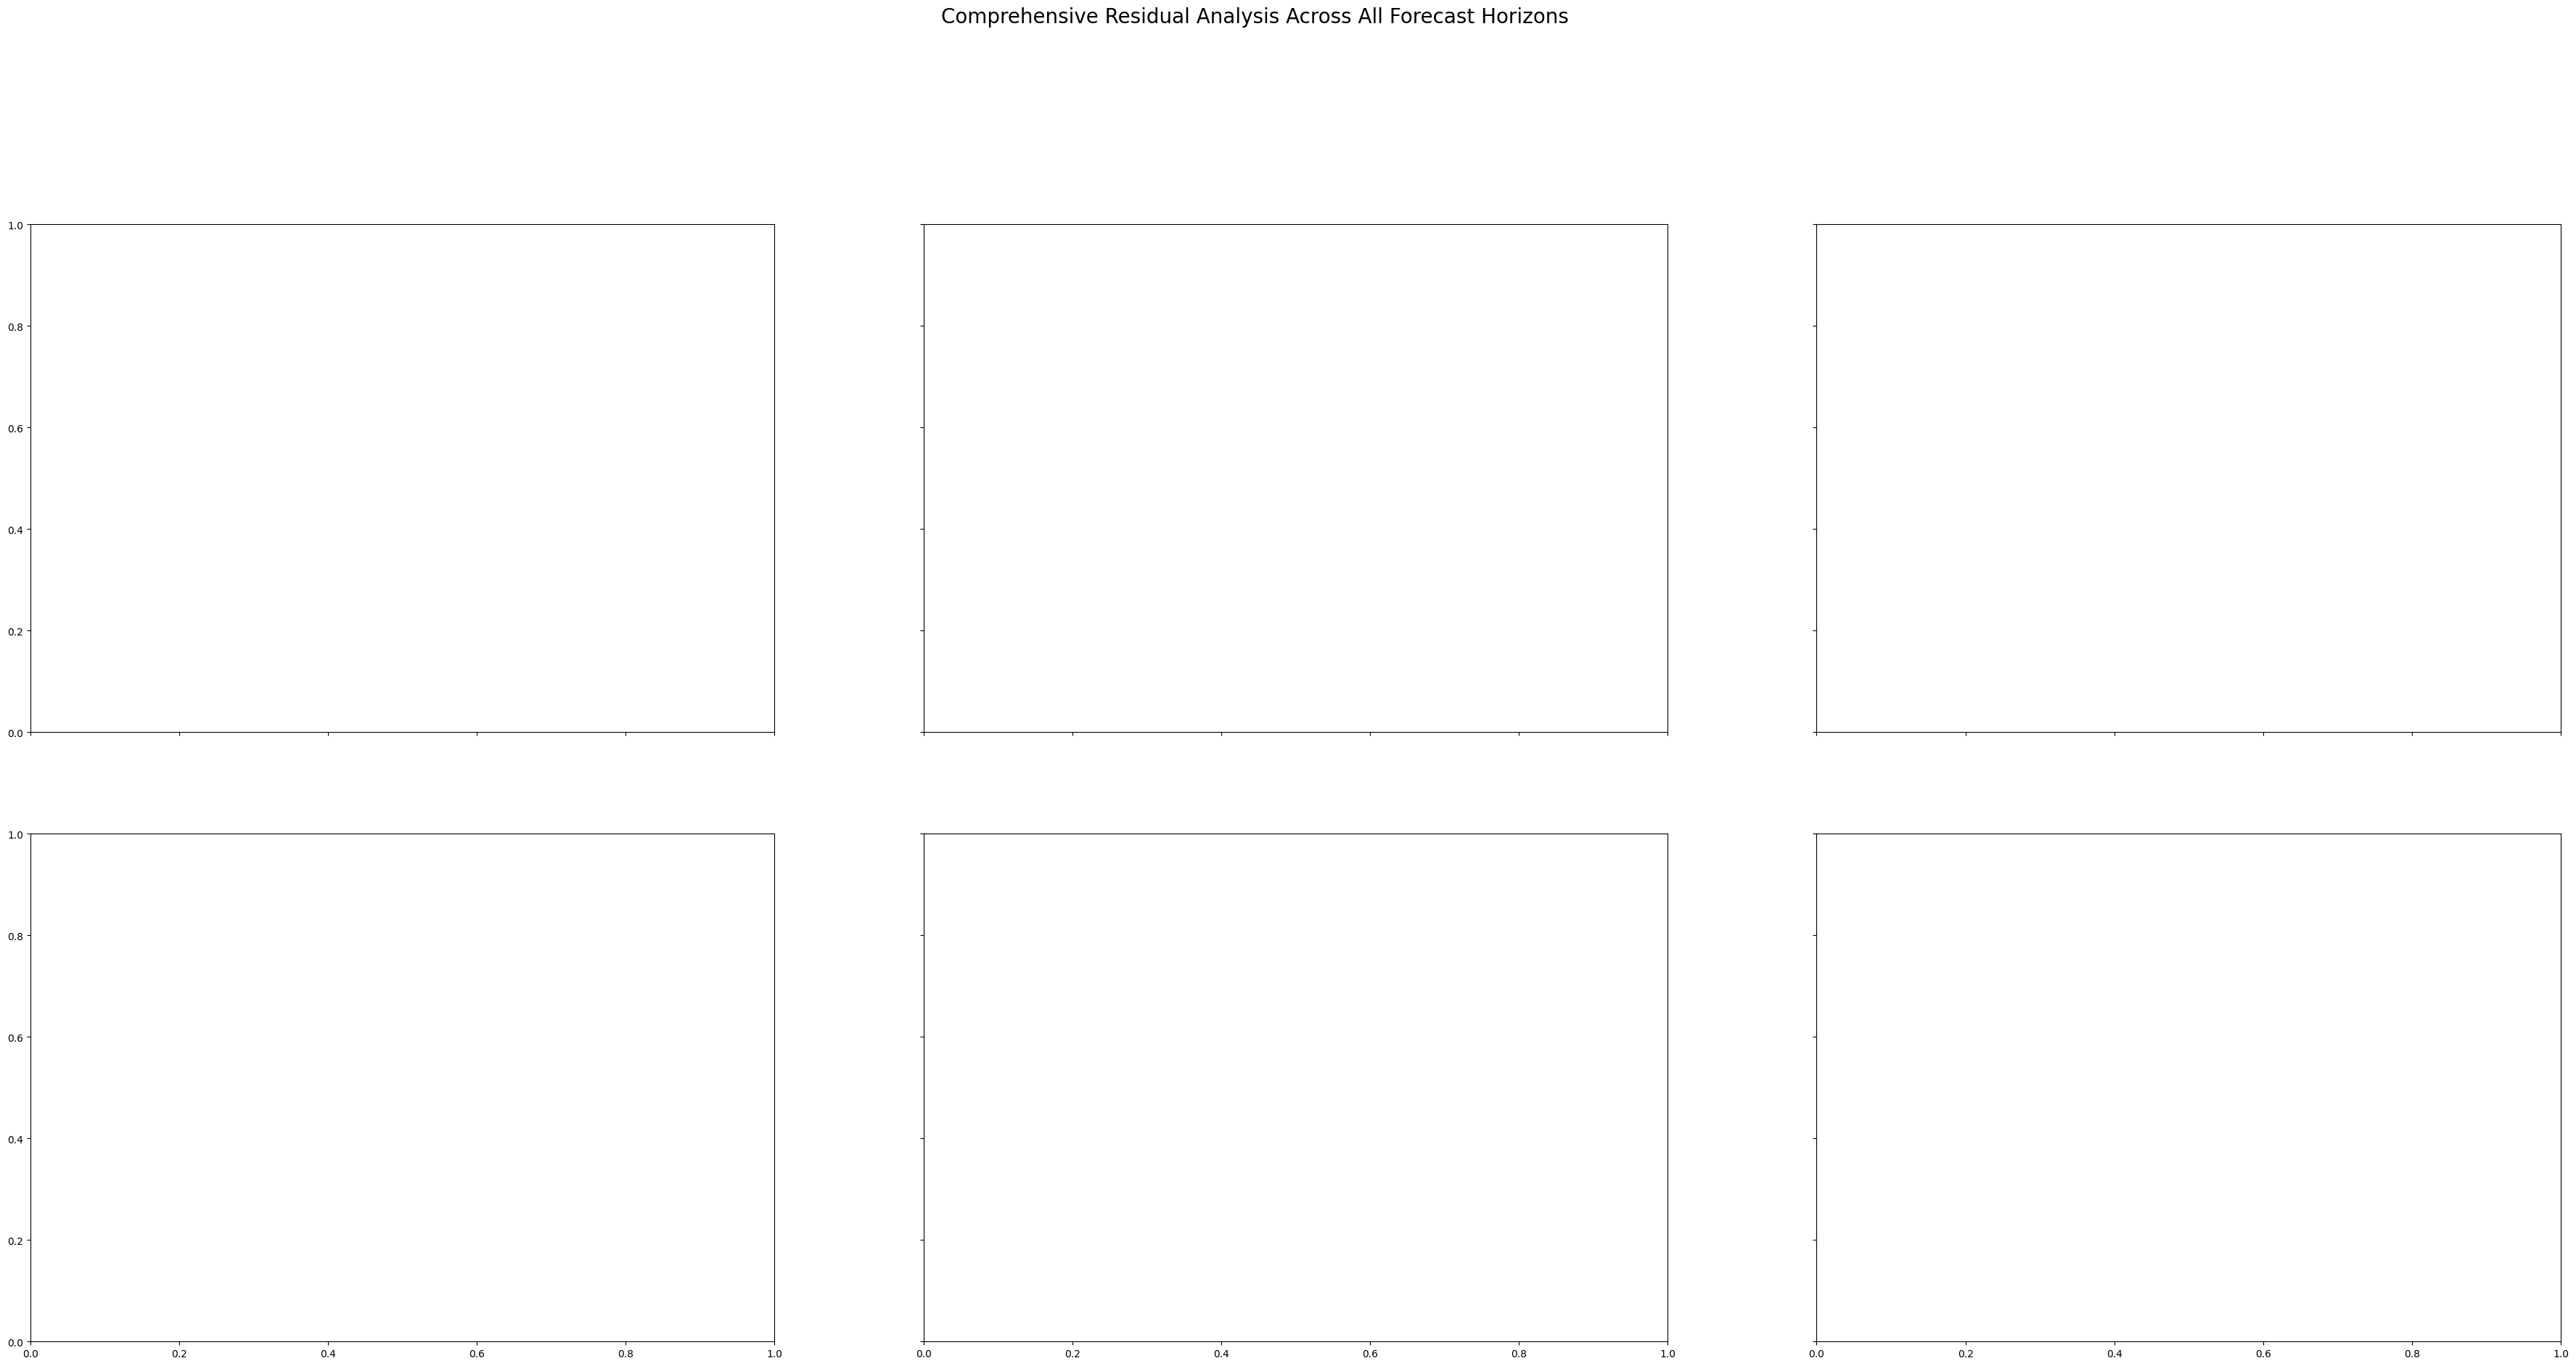

In [ ]:
# Multi-Horizon Error Analysis

import matplotlib.pyplot as plt

# Create a 2x5 grid of plots (2 rows for Min/Max, 5 columns for horizons)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(45, 20), sharex=True, sharey=True)
fig.suptitle('Comprehensive Residual Analysis Across All Forecast Horizons', fontsize=20, y=1.03)

for i in range(3):
    horizon = i + 1
    max_resid_col = f'Residual_Target_Max_Temp_C_t+{horizon}'
    min_resid_col = f'Residual_Target_Min_Temp_C_t+{horizon}'

    # --- Plot Max Temperature Residuals (Top Row) ---
    ax_max = axes[0, i]
    ax_max.plot(residuals_df.index, residuals_df[max_resid_col], 'o', alpha=0.4, color='coral')
    ax_max.axhline(0, color='black', linestyle='--')
    ax_max.set_title(f'Max Temp Error (t+{horizon})')
    ax_max.grid(True, linestyle='--', alpha=0.6)

    # --- Plot Min Temperature Residuals (Bottom Row) ---
    ax_min = axes[1, i]
    ax_min.plot(residuals_df.index, residuals_df[min_resid_col], 'o', alpha=0.4, color='skyblue')
    ax_min.axhline(0, color='black', linestyle='--')
    ax_min.set_title(f'Min Temp Error (t+{horizon})')
    ax_min.grid(True, linestyle='--', alpha=0.6)

# Set common labels
axes[0, 0].set_ylabel('Error (°C)')
axes[1, 0].set_ylabel('Error (°C)')

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to make space for subtitle
plt.savefig('../images/Multi-Horizon_Residual_Analysis.png', bbox_inches='tight')
plt.show()

In [ ]:
import joblib

# 1. Define the filename. This name signifies it's our champion model.
model_filename = '..\champion_model_phase1.joblib'

# 2. Use joblib.dump to save the trained model object to a file.
#    The 'compress=3' argument makes the saved file smaller, which is good practice.
joblib.dump(best_xgb_model, model_filename, compress=3)

print(f"✅ Model successfully saved!")
print(f"Filename: {model_filename}")
print("You can now find this file in your project directory.")

✅ Model successfully saved!
Filename: ..\champion_model_phase1.joblib
You can now find this file in your project directory.


In [ ]:
print(X_train.columns)

Index(['Precipitation_mm', 'Precipitation_7d_rolling_sum', 'Year', 'Month',
       'Day_of_Year', 'Day_of_Week', 'Month_sin', 'Month_cos',
       'Day_of_Year_sin', 'Day_of_Year_cos', 'Max_Temp_C_lag_1',
       'Min_Temp_C_lag_1', 'Max_Temp_C_lag_2', 'Min_Temp_C_lag_2',
       'Max_Temp_C_lag_3', 'Min_Temp_C_lag_3', 'Max_Temp_C_lag_7',
       'Min_Temp_C_lag_7', 'Precipitation_mm_lag_1', 'Precipitation_mm_lag_2',
       'Precipitation_mm_lag_3', 'Precipitation_mm_lag_7',
       'Max_Temp_C_rolling_mean_7d', 'Min_Temp_C_rolling_mean_7d',
       'Max_Temp_C_rolling_std_7d', 'Min_Temp_C_rolling_std_7d',
       'Max_Temp_C_rolling_mean_30d', 'Min_Temp_C_rolling_mean_30d',
       'Max_Temp_C_rolling_std_30d', 'Min_Temp_C_rolling_std_30d',
       'Precipitation_mm_rolling_sum_7d', 'Precipitation_mm_rolling_std_7d',
       'Precipitation_mm_rolling_sum_30d', 'Precipitation_mm_rolling_std_30d',
       'Daily_Temp_Range', 'Daily_Temp_Range_lag_1'],
      dtype='object')
